# Topological Machine Learning

## Topological Data Analysis acting as a support for deep learning

### Introduction

We have seen how to use topological data analysis as a model for a classification problem. However, the use of TDA in the context of classification is more known for its role of support. In many cases, TDA is used as a tool to *preprocess* the input data, i.e., to extract features of our data which will later be fed to another model. Such process is often applied in the hopes that the model will perform better with the help of TDA.

In this notebook, we will explore the use of TDA as a supporting tool for classifying 1-D time series data with a neural network. However, the gain is of a slighlty different nature: we hope that by using tools of topological data analysis, we will obtain more insight of our problem at hand. 

**Motivation**: suppose that you have a neural network that is trying to classify some sort of signal --for example, a hearbeat signal. How can you be sure that the neural network is picking up the right information and not some strange artefacts?

**Process**: we propose to decompose the signal into its landscape levels, stack them together and feed it to a neural network. In a very natural way, we achieve a hierarchical representacion such that the network can choose which information is necessary to perform the classification.

There is one supporting file with this notebook, *reconstruction.py*, which contains functions that compute persistence homology of 1-D timeseries vectors and compute its reconstruction based on a landscape representation.

### Getting started

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gudhi
from scipy.interpolate import interp1d
from reconstruction import *

A 1-D timeseries vector can be interpreted as a piece-wise lineal function

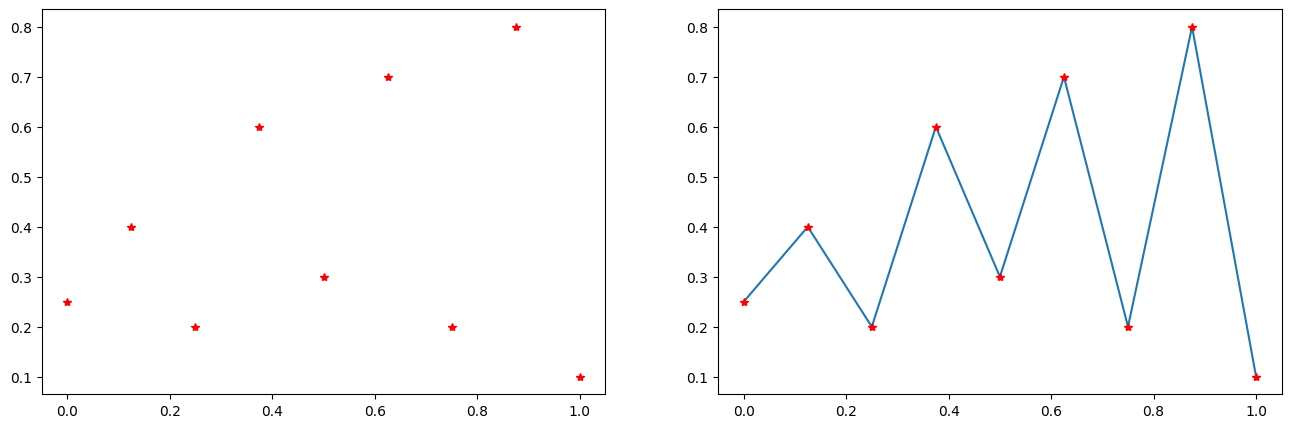

In [2]:
#Vector data
y = [0.25, 0.4, 0.2, 0.6, 0.3, 0.7, 0.2, 0.8, 0.1]
x = np.linspace(0, 1, len(y))

#Piece wise linear data where the critical points are described by the previous vector data
f = interp1d(x, y, kind='linear')
xnew = np.linspace(0, 1, num=500, endpoint=True)
ynew = f(xnew)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(x, y, "*", color='red')

ax2.plot(xnew, ynew, "-")
ax2.plot(x, y, "*", color='red')
plt.show()

We can compute a persistence diagram from a function by counting the connected components of the sublevel sets. From a persistence diagram, we can obtain the set of landscapes. Gudhi allows you to compute a set number of landscapes, although that does not mean that the $n$-th landscape will be different from 0. 

In the following example, we compute 10 levels of landscape, but the last one is already zero, and that means that further levels would also be equal to 0. 

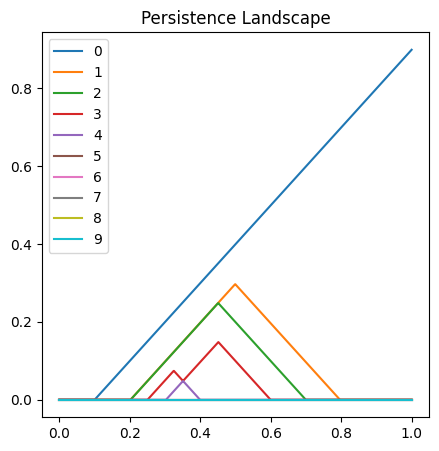

In [3]:
persistence = getPersistence(ynew, clean=False)
diag = persistence[0]

nbld =  10
resolution = 1000
length_max = 1
length_min = 0
ld_dim = 0 # landscape dim

L = landscapes_approx([x[1] for x in diag], length_min, length_max, resolution,nbld)
LL = np.array(L)

plt.figure(figsize=(5, 5))
yy = np.linspace(0, 1, num=resolution, endpoint=True)
for i in range(nbld):
    plt.plot(yy, LL[i])
plt.title("Persistence Landscape")
plt.legend([str(i) for i in range(10)])
plt.show()

Let us reconstruct the original function from its landscapes. Reconstructing, in this case, means recovering the critical points, since linearly interpolating them will yield the original piece-wise linear function. 

Landscapes are directly related with the persistence diagram. Not all landscapes are necessarily needed to reconstruct the function. Theory regarding the reconstruction of functions can be found here https://arxiv.org/abs/2203.01894.

For the reconstruction process, two plots are presented:
- Left plot: a representation of the i-th landscape level. *Takeoff* points and local minimums/maximums are highlighted in red since they are involved in the reconstruction.
- Right plot: the original function. Points that are being recovered at that exact step are highlighted in red. Points that were recovered in a previous step are highlighted as a orange star. A linear interpolation between the recovered points is highlighted in orange. Once all critical points have been recovered, the whole original function should be highlighted in orange.

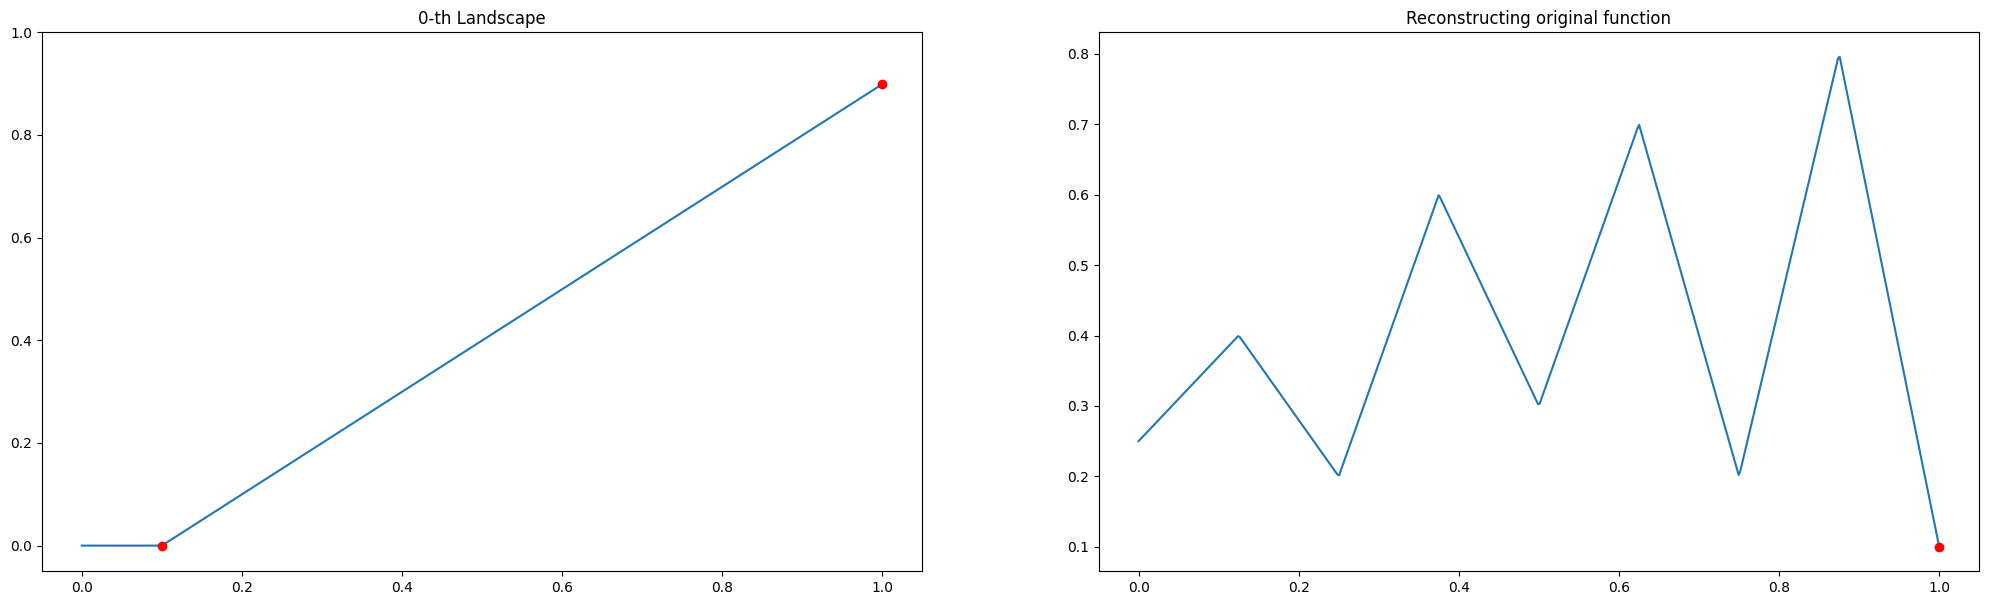

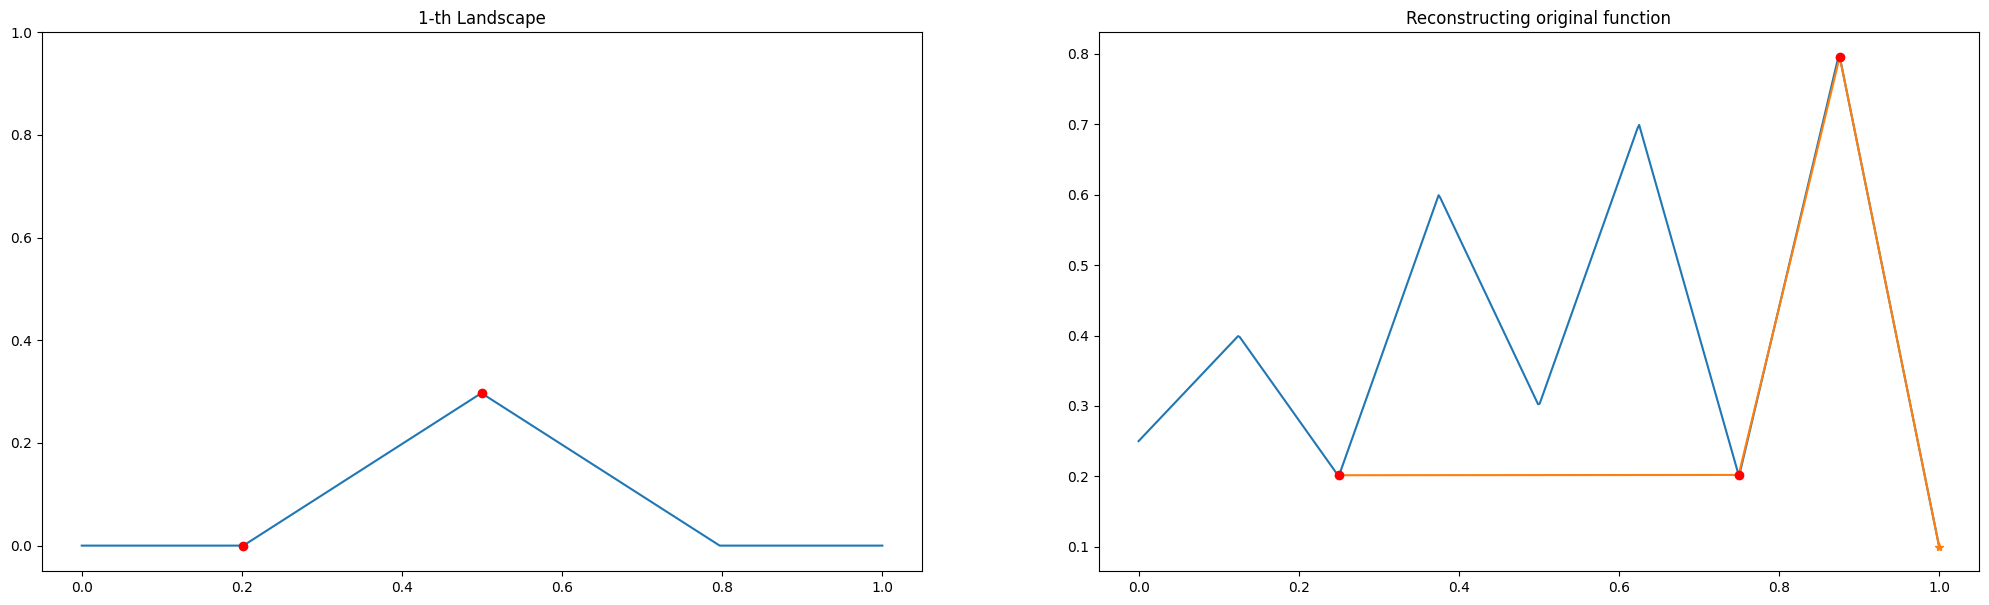

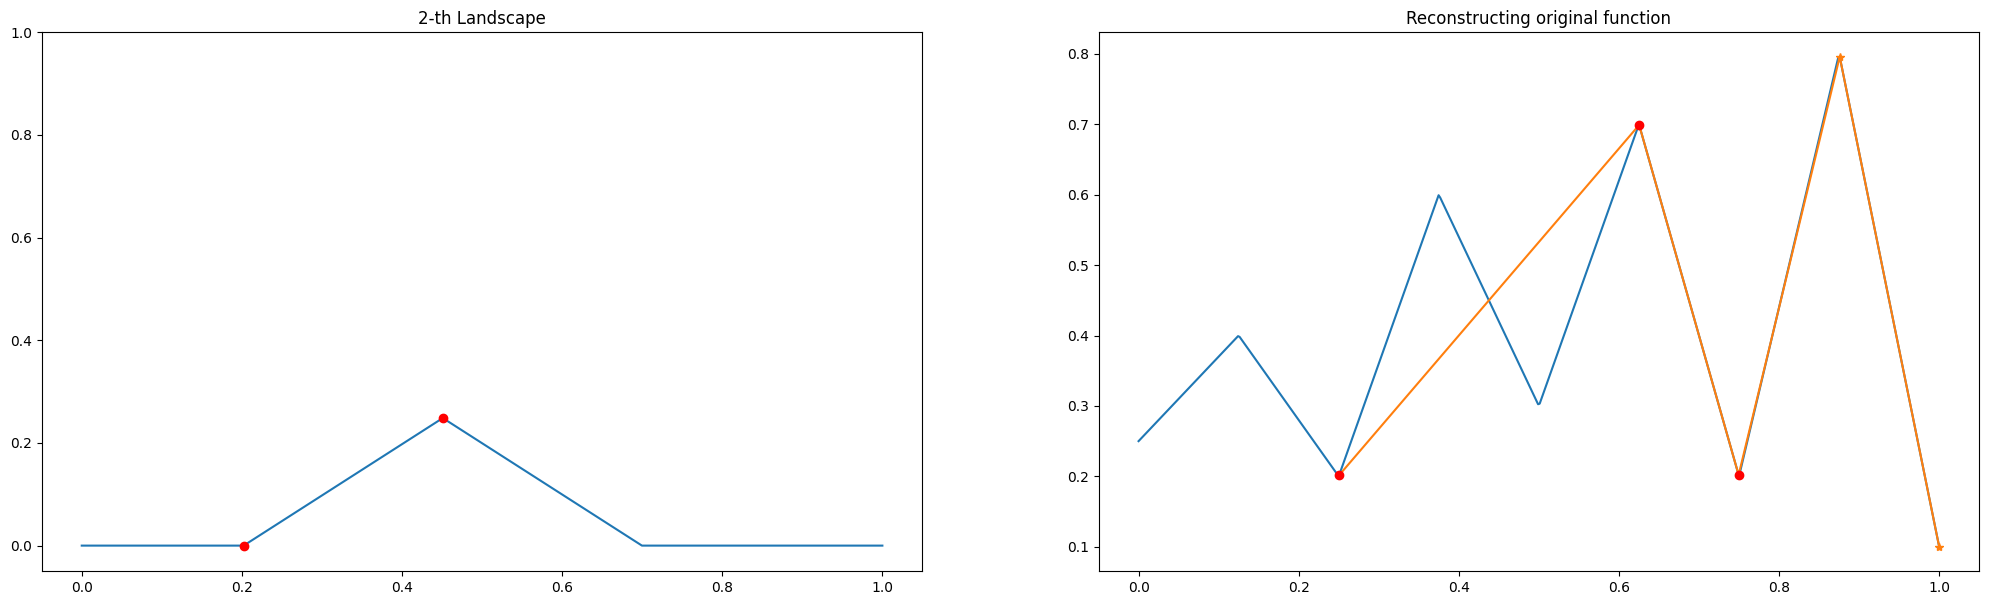

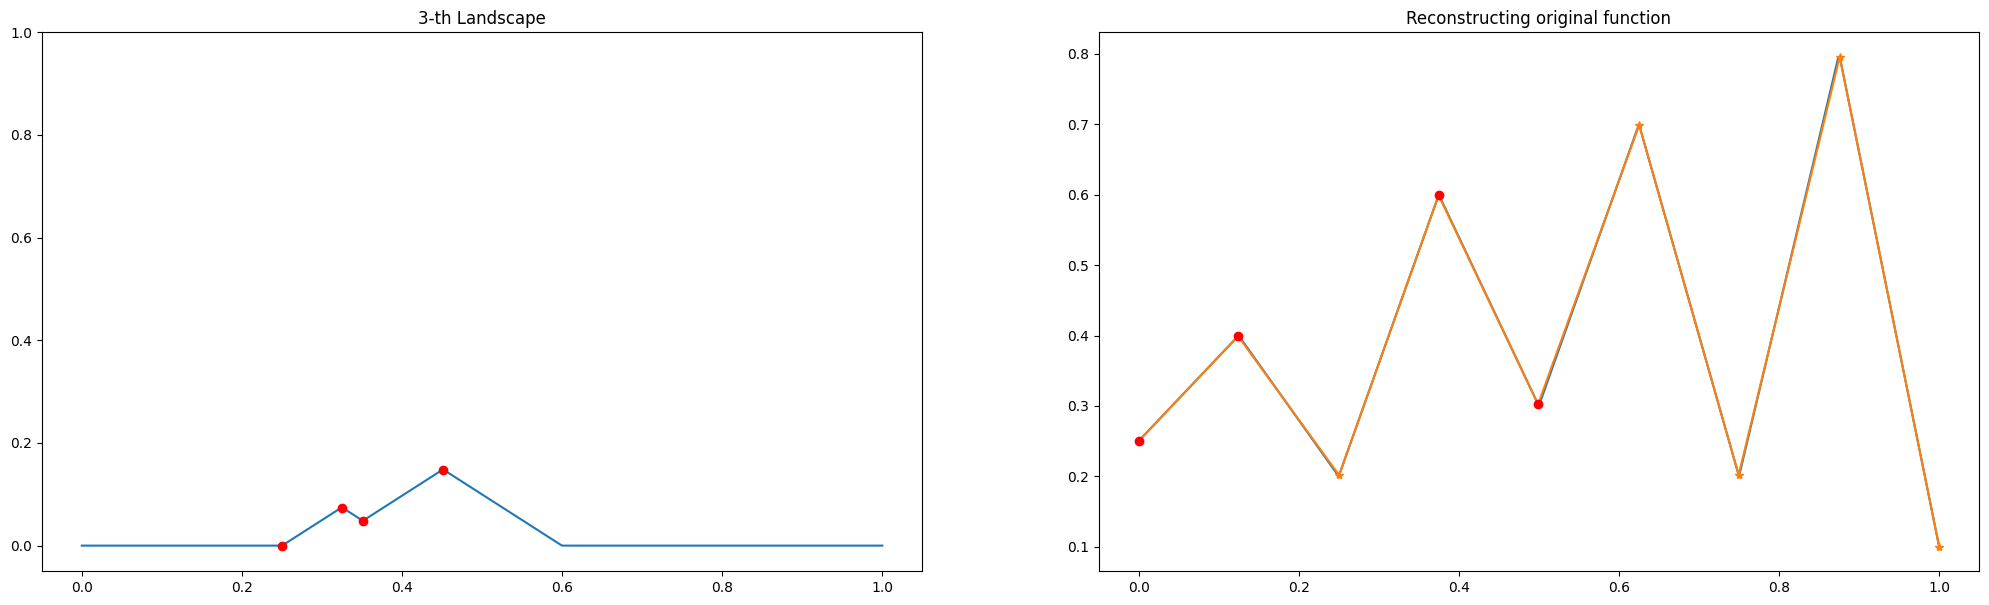

In [4]:
plot_paralel(LL, resolution, ynew, xnew, 0)
plot_paralel(LL, resolution, ynew, xnew, 1)
plot_paralel(LL, resolution, ynew, xnew, 2)
plot_paralel(LL, resolution, ynew, xnew, 3)

Wigh $4$ level of landscapes we have fully recovered the original function, but there are still more levels that are different from 0. If we use them in further steps of the reconstruction, we will recover points that we already have.

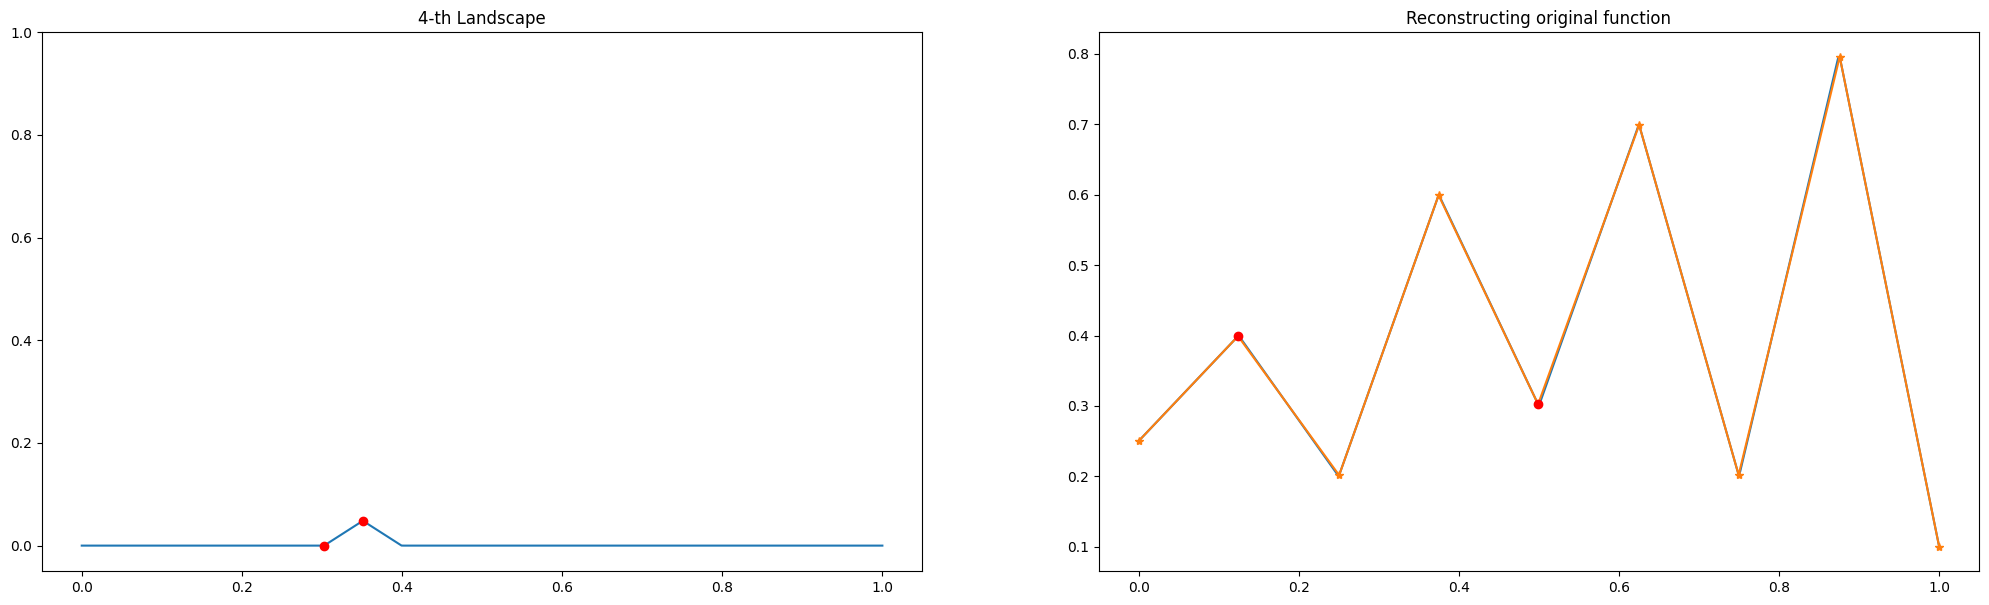

In [5]:
plot_paralel(LL, resolution, ynew, xnew, 4)